In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns

In [3]:
df_raw = pd.read_csv("../data/train.csv")
df = df_raw.copy()
df

,id,timestamp,remote_addr,remote_user,hostname,time_local,request,status,body_bytes_sent,http_referer,...,upstream_connect_time,upstream_header_time,upstream_response_time,upstream_addr,upstream_status,connection,connection_requests,data.srcip,agent.ip,rule.mitre.tactic
0,0,"Aug 29, 2023 @ 17:00:03.058",114.4.220.184,-,vm-director-nginx,30/Aug/2023:00:00:02 +0700,GET /auth/resources/ofl9o/login/ub/ HTTP/2.0,404,118,-,...,0.001,0.002,0.002,10.45.184.148:32442,404,688306444,2,114.4.220.184,192.168.1.99,"[""non-attack""]"
1,1,"Aug 29, 2023 @ 17:00:33.070",10.200.160.148,-,vm-director-nginx,30/Aug/2023:00:00:31 +0700,GET /auth/resources/ofl9o/login/ub/ HTTP/2.0,404,118,-,...,0,0.002,0.002,10.45.184.154:32442,404,688306865,2,10.200.160.148,192.168.1.99,"[""non-attack""]"
2,2,"Aug 29, 2023 @ 17:00:33.072",180.248.46.18,-,vm-director-nginx,30/Aug/2023:00:00:31 +0700,GET /auth/resources/ofl9o/login/ub/ HTTP/2.0,404,118,-,...,0.001,0.002,0.002,10.45.184.148:32442,404,688306855,2,180.248.46.18,192.168.1.99,"[""non-attack""]"
3,3,"Aug 29, 2023 @ 17:00:33.076",125.166.3.1,-,vm-director-nginx,30/Aug/2023:00:00:32 +0700,GET /auth/resources/ofl9o/login/ub/ HTTP/2.0,404,118,-,...,0,0.002,0.002,10.45.184.154:32442,404,688306869,2,125.166.3.1,192.168.1.99,"[""non-attack""]"
4,4,"Aug 29, 2023 @ 17:00:59.118",103.108.23.13,-,vm-director-nginx,30/Aug/2023:00:00:58 +0700,GET /auth/resources/ofl9o/login/ub/ HTTP/2.0,404,118,-,...,0.001,0.003,0.003,10.45.184.154:32442,404,688307225,2,103.108.23.13,192.168.1.99,"[""non-attack""]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54475,54475,"Sep 5, 2023 @ 00:26:40.840",202.80.216.211,-,vm-director-nginx,05/Sep/2023:07:26:39 +0700,GET /auth/resources/ofl9o/login/ub/ HTTP/2.0,404,118,-,...,0,0.002,0.002,10.45.184.154:32442,404,721724820,2,202.80.216.211,192.168.1.99,"[""non-attack""]"
54476,54476,"Sep 5, 2023 @ 00:26:40.880",114.5.245.55,-,vm-director-nginx,05/Sep/2023:07:26:40 +0700,GET /.well-known/assetlinks.json HTTP/2.0,404,74,-,...,0,0.001,0.001,10.45.184.154:32442,404,721725022,1,114.5.245.55,192.168.1.99,"[""non-attack""]"
54477,54477,"Sep 5, 2023 @ 00:26:40.907",114.5.245.55,-,vm-director-nginx,05/Sep/2023:07:26:40 +0700,GET /auth/resources/ofl9o/login/ub/ HTTP/2.0,404,118,-,...,0.001,0.002,0.002,10.45.184.154:32442,404,721725023,2,114.5.245.55,192.168.1.99,"[""non-attack""]"
54478,54478,"Sep 5, 2023 @ 00:26:40.913",10.27.97.71,-,vm-director-nginx,05/Sep/2023:07:26:40 +0700,GET /auth/resources/ofl9o/login/ub/ HTTP/2.0,404,118,-,...,0.001,0.002,0.002,10.45.184.148:32442,404,721725017,2,10.27.97.71,192.168.1.99,"[""non-attack""]"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54480 entries, 0 to 54479
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      54480 non-null  int64  
 1   timestamp               54480 non-null  object 
 2   remote_addr             54480 non-null  object 
 3   remote_user             54480 non-null  object 
 4   hostname                54480 non-null  object 
 5   time_local              54480 non-null  object 
 6   request                 54480 non-null  object 
 7   status                  54480 non-null  int64  
 8   body_bytes_sent         54480 non-null  int64  
 9   http_referer            54480 non-null  object 
 10  http_user_agent         54480 non-null  object 
 11  http_x_forwarded_for    54480 non-null  object 
 12  time_iso8601            54480 non-null  object 
 13  request_method          54480 non-null  object 
 14  request_length          54480 non-null

In [5]:
df.describe()

,id,status,body_bytes_sent,request_length,bytes_sent,request_time,upstream_status,connection,connection_requests
count,54480.00000,54480.000000,54480.000000,5.448000e+04,54480.000000,54480.000000,54480.000000,5.448000e+04,54480.000000
mean,27239.50000,397.882360,755.609710,2.805849e+03,981.246623,0.112437,397.882360,7.044505e+08,13.211399
std,15727.16567,37.144417,2720.382111,5.148133e+05,2764.017620,2.029623,37.144417,9.904437e+06,55.238582
min,0.00000,200.000000,0.000000,7.000000e+00,0.000000,0.000000,200.000000,6.883064e+08,1.000000
25%,13619.75000,404.000000,118.000000,6.800000e+01,330.000000,0.002000,404.000000,6.953626e+08,2.000000
50%,27239.50000,404.000000,118.000000,8.200000e+01,330.000000,0.002000,404.000000,7.070448e+08,2.000000
75%,40859.25000,404.000000,118.000000,1.570000e+02,330.000000,0.003000,404.000000,7.133737e+08,4.000000
max,54479.00000,504.000000,66091.000000,1.173918e+08,66584.000000,61.697000,504.000000,7.217323e+08,998.000000


In [7]:
df_check = df_raw.apply(pd.Series.unique)
df_check["rule.mitre.tactic"]

array(['["non-attack"]', '["Impact"]', '["Defense Evasion"]',
       '["Reconnaissance"]', '["Credential Access"]',
       '["Initial Access"]'], dtype=object)

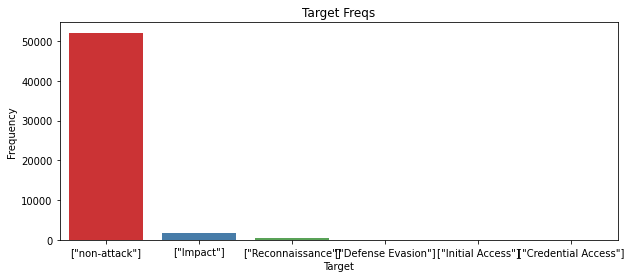

In [75]:
# Check data balance

import seaborn as sns
import matplotlib.pyplot as plt

target_counts = df['rule.mitre.tactic'].value_counts()

# Create a bar plot to visualize the frequency
plt.figure(figsize=(10, 4))
sns.barplot(x=target_counts.index, y=target_counts.values, palette='Set1')
plt.title('Target Freqs')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

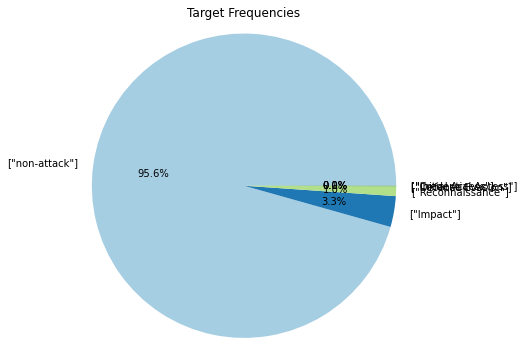

In [33]:
target_counts = df['rule.mitre.tactic'].value_counts()

# Create a pie chart to visualize the frequency
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(target_counts))))
plt.title('Target Frequencies')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [10]:
import pandas as pd

for column in df.columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print()


Value counts for id:
0        1
36312    1
36314    1
36315    1
36316    1
        ..
18162    1
18163    1
18164    1
18165    1
54479    1
Name: id, Length: 54480, dtype: int64

Value counts for timestamp:
Sep 3, 2023 @ 04:38:54.984     4
Sep 1, 2023 @ 00:45:01.641     4
Aug 31, 2023 @ 19:45:43.809    4
Aug 31, 2023 @ 18:50:40.292    4
Aug 30, 2023 @ 21:37:12.799    4
                              ..
Aug 31, 2023 @ 19:45:33.757    1
Aug 31, 2023 @ 19:45:33.759    1
Aug 31, 2023 @ 19:45:33.767    1
Aug 31, 2023 @ 19:45:33.784    1
Sep 5, 2023 @ 00:26:42.985     1
Name: timestamp, Length: 54054, dtype: int64

Value counts for remote_addr:
159.65.1.196       1676
154.26.134.113     1244
45.76.154.182      1172
170.64.192.156      780
192.18.139.147      565
                   ... 
10.23.129.140         1
125.162.183.243       1
180.248.22.84         1
10.200.83.94          1
10.27.97.71           1
Name: remote_addr, Length: 18956, dtype: int64

Value counts for remote_user:
-         

In [11]:
for column in df.columns:
    unique_count = df[column].nunique()
    print(f"Number of unique values in '{column}': {unique_count}")

Number of unique values in 'id': 54480
Number of unique values in 'timestamp': 54054
Number of unique values in 'remote_addr': 18956
Number of unique values in 'remote_user': 3
Number of unique values in 'hostname': 1
Number of unique values in 'time_local': 39879
Number of unique values in 'request': 5811
Number of unique values in 'status': 14
Number of unique values in 'body_bytes_sent': 816
Number of unique values in 'http_referer': 977
Number of unique values in 'http_user_agent': 2582
Number of unique values in 'http_x_forwarded_for': 3
Number of unique values in 'time_iso8601': 39879
Number of unique values in 'request_method': 3
Number of unique values in 'request_length': 1194
Number of unique values in 'bytes_sent': 973
Number of unique values in 'http_referer2': 977
Number of unique values in 'request_time': 1073
Number of unique values in 'upstream_connect_time': 59
Number of unique values in 'upstream_header_time': 791
Number of unique values in 'upstream_response_time': 8

In [19]:
for i in range(50):
    print(df['http_user_agent'][i])

Mozilla/5.0 (Linux; Android 11; Redmi Note 8) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.98 Mobile Safari/537.36
Mozilla/5.0 (Linux; Android 10; K) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Mobile Safari/537.36
Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36
Mozilla/5.0 (Linux; Android 12; M2003J15SC) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Mobile Safari/537.36
Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36
Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36
Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36
Mozilla/5.0 (Linux; Android 10; K) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Mobile Safari/537.36
Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Saf

In [23]:
df['browser'] = df['http_user_agent'].str.split().str[0]

# Print the DataFrame to see the result
print(df['browser'])
df['browser'].nunique()

0        Mozilla/5.0
1        Mozilla/5.0
2        Mozilla/5.0
3        Mozilla/5.0
4        Mozilla/5.0
            ...     
54475    Mozilla/5.0
54476    Mozilla/5.0
54477    Mozilla/5.0
54478    Mozilla/5.0
54479    Mozilla/5.0
Name: browser, Length: 54480, dtype: object


38

In [25]:
print(df['browser'].value_counts())
print()

Mozilla/5.0                               51513
Mozlila/5.0                                2137
Go-http-client/2.0                          188
python-requests/2.27.1                      146
wp_is_mobile                                 95
Dalvik/2.1.0                                 86
Gapura%20UB/78                               55
Chrome                                       44
python-requests/2.28.1                       39
-                                            33
Go-http-client/1.1                           24
python-requests/2.31.0                       21
python-requests/2.26.0                       15
Linux                                        14
GuzzleHttp/7                                 13
WhatsApp/2.23.16.78                          10
Test                                          8
Mozila/5.0                                    5
facebookexternalhit/1.1                       5
Gapura%20UB/76                                3
Microsoft                               

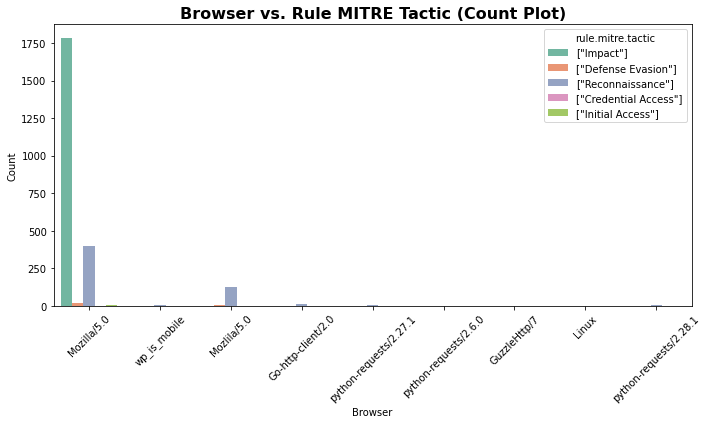

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['rule.mitre.tactic']!='["non-attack"]'], x='browser', hue='rule.mitre.tactic', palette='Set2')

plt.xlabel('Browser')
plt.ylabel('Count')
plt.title('Browser vs. Rule MITRE Tactic (Count Plot)', fontsize=16, fontweight='bold')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

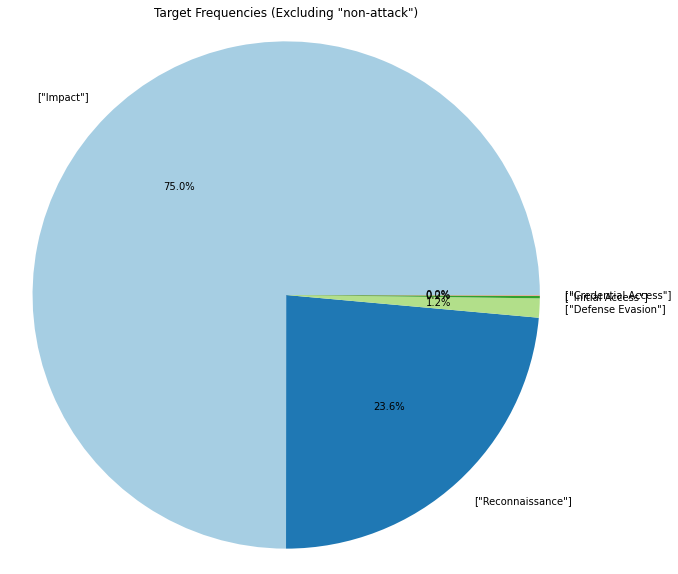

In [104]:
import matplotlib.pyplot as plt

# Sample DataFrame with 'rule.mitre.tactic' as the target variable
filtered_df = df[df['rule.mitre.tactic'] != '["non-attack"]']

# Get the value counts for the filtered DataFrame
target = filtered_df['rule.mitre.tactic'].value_counts()

# Create a pie chart to visualize the frequency
plt.figure(figsize=(10, 10))
plt.pie(target, labels=target.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(target_counts))))
plt.title('Target Frequencies (Excluding "non-attack")')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


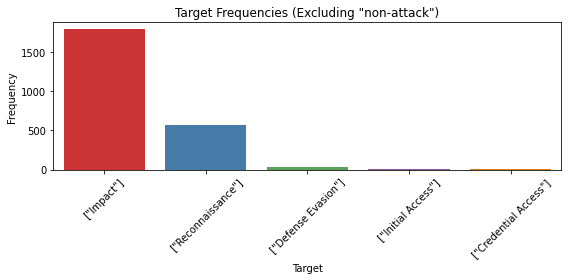

In [40]:
plt.figure(figsize=(8, 4))
sns.barplot(x=target.index, y=target.values, palette='Set1')
plt.title('Target Frequencies (Excluding "non-attack")')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the bar chart
plt.tight_layout()
plt.show()

In [45]:
cred_df = df[df['rule.mitre.tactic'] == '["Credential Access"]']
cred_df

,id,timestamp,remote_addr,remote_user,hostname,time_local,request,status,body_bytes_sent,http_referer,...,upstream_header_time,upstream_response_time,upstream_addr,upstream_status,connection,connection_requests,data.srcip,agent.ip,rule.mitre.tactic,browser
22171,22171,"Sep 1, 2023 @ 00:28:08.410",85.215.200.224,-,vm-director-nginx,01/Sep/2023:07:28:07 +0700,POST /wp-login.php HTTP/1.1,200,956,https://admisi.notrealdomain.com/wp-admin/,...,0.006,0.006,175.45.184.125:80,200,701008974,1,85.215.200.224,192.168.1.99,"[""Credential Access""]",Mozilla/5.0


In [44]:
df[df['request'].str.contains('wp-login')]

,id,timestamp,remote_addr,remote_user,hostname,time_local,request,status,body_bytes_sent,http_referer,...,upstream_header_time,upstream_response_time,upstream_addr,upstream_status,connection,connection_requests,data.srcip,agent.ip,rule.mitre.tactic,browser
16810,16810,"Aug 31, 2023 @ 01:52:00.118",152.67.234.119,-,vm-director-nginx,31/Aug/2023:08:51:59 +0700,GET /wp-content/plugins/w0rdpr3ssnew/wp-login....,404,12242,www.google.com,...,0.41,0.411,10.45.184.171:80,404,695912374,2,152.67.234.119,192.168.1.99,"[""non-attack""]",Mozlila/5.0
16901,16901,"Aug 31, 2023 @ 01:53:42.073",152.67.234.119,-,vm-director-nginx,31/Aug/2023:08:53:41 +0700,GET /wp-admin/js/widgets/wp-login.php HTTP/1.1,404,12242,www.google.com,...,0.45,0.45,10.45.184.171:80,404,695924131,2,152.67.234.119,192.168.1.99,"[""non-attack""]",Mozlila/5.0
17488,17488,"Aug 31, 2023 @ 18:09:41.436",101.44.80.241,-,vm-director-nginx,01/Sep/2023:01:09:40 +0700,GET /wp-app/pendaftaran/smub/wp-login.php HTTP...,502,559,-,...,-,0.001,175.45.184.173:80,502,700403718,1,101.44.80.241,192.168.1.99,"[""non-attack""]",Mozilla/5.0
21717,21717,"Sep 1, 2023 @ 00:18:41.964",85.215.200.224,-,vm-director-nginx,01/Sep/2023:07:18:39 +0700,POST /wp-login.php HTTP/1.1,404,47,https://siam.notrealdomain.com/wp-admin/,...,0.003,0.003,175.45.184.234:80,404,700926127,1,85.215.200.224,192.168.1.99,"[""non-attack""]",Mozilla/5.0
22171,22171,"Sep 1, 2023 @ 00:28:08.410",85.215.200.224,-,vm-director-nginx,01/Sep/2023:07:28:07 +0700,POST /wp-login.php HTTP/1.1,200,956,https://admisi.notrealdomain.com/wp-admin/,...,0.006,0.006,175.45.184.125:80,200,701008974,1,85.215.200.224,192.168.1.99,"[""Credential Access""]",Mozilla/5.0
22466,22466,"Sep 1, 2023 @ 00:31:10.717",85.215.200.224,-,vm-director-nginx,01/Sep/2023:07:31:09 +0700,POST /wp-login.php HTTP/1.1,404,47,https://siam.notrealdomain.com/wp-admin/,...,0.003,0.003,175.45.184.234:80,404,701046170,1,85.215.200.224,192.168.1.99,"[""non-attack""]",Mozilla/5.0
22631,22631,"Sep 1, 2023 @ 00:36:04.987",85.215.200.224,-,vm-director-nginx,01/Sep/2023:07:36:02 +0700,POST /wp-login.php HTTP/1.1,404,47,https://siam.notrealdomain.com/wp-admin/,...,0.003,0.003,175.45.184.234:80,404,701085872,1,85.215.200.224,192.168.1.99,"[""non-attack""]",Mozilla/5.0
22880,22880,"Sep 1, 2023 @ 00:41:49.396",85.215.200.224,-,vm-director-nginx,01/Sep/2023:07:41:47 +0700,POST /wp-login.php HTTP/1.1,404,47,https://siam.notrealdomain.com/wp-admin/,...,0.002,0.002,175.45.184.234:80,404,701137915,1,85.215.200.224,192.168.1.99,"[""non-attack""]",Mozilla/5.0
25570,25570,"Sep 1, 2023 @ 18:48:09.307",38.98.134.193,-,vm-director-nginx,02/Sep/2023:01:48:07 +0700,GET /wp-app/pendaftaran/smub/wp-login.php HTTP...,502,559,-,...,-,0,175.45.184.173:80,502,706874239,1,38.98.134.193,192.168.1.99,"[""non-attack""]",Mozilla/5.0
25683,25683,"Sep 1, 2023 @ 19:16:51.231",13.89.204.139,-,vm-director-nginx,02/Sep/2023:02:16:50 +0700,GET /wp-login.php HTTP/1.1,404,2356,-,...,0.01,0.01,175.45.185.12:80,404,706882048,1,13.89.204.139,192.168.1.99,"[""non-attack""]",Mozilla/5.0


In [62]:
defense_df = df[df['rule.mitre.tactic'] == '["Defense Evasion"]']
defense_df

,id,timestamp,remote_addr,remote_user,hostname,time_local,request,status,body_bytes_sent,http_referer,...,upstream_header_time,upstream_response_time,upstream_addr,upstream_status,connection,connection_requests,data.srcip,agent.ip,rule.mitre.tactic,browser
873,873,"Aug 29, 2023 @ 21:29:41.014",128.199.114.240,-,vm-director-nginx,30/Aug/2023:04:29:39 +0700,GET //wp-content/plugins/wpcargo/includes/barc...,404,2353,-,...,0.017,0.017,175.45.185.12:80,404,688489692,1,128.199.114.240,192.168.1.99,"[""Defense Evasion""]",Mozilla/5.0
16743,16743,"Aug 31, 2023 @ 01:50:37.881",152.67.234.119,-,vm-director-nginx,31/Aug/2023:08:50:36 +0700,GET //wp-content/plugins/wpcargo/includes/barc...,301,0,www.google.com,...,0.322,0.322,10.45.184.171:80,301,695903401,1,152.67.234.119,192.168.1.99,"[""Defense Evasion""]",Mozlila/5.0
16744,16744,"Aug 31, 2023 @ 01:50:37.883",152.67.234.119,-,vm-director-nginx,31/Aug/2023:08:50:36 +0700,GET /wp-content/plugins/wpcargo/includes/barco...,404,12242,www.google.com,...,0.419,0.42,10.45.184.171:80,404,695903401,2,152.67.234.119,192.168.1.99,"[""Defense Evasion""]",Mozlila/5.0
19843,19843,"Aug 31, 2023 @ 23:41:01.339",50.21.182.182,-,vm-director-nginx,01/Sep/2023:06:40:59 +0700,GET /env.bak HTTP/1.1,404,74,-,...,0.001,0.001,10.45.184.154:32442,404,700725990,1,50.21.182.182,192.168.1.99,"[""Defense Evasion""]",Mozilla/5.0
19863,19863,"Aug 31, 2023 @ 23:41:45.395",50.21.182.182,-,vm-director-nginx,01/Sep/2023:06:41:43 +0700,GET /env.bak HTTP/1.1,404,1115,-,...,0.001,0.001,175.45.185.77:80,404,700728008,1,50.21.182.182,192.168.1.99,"[""Defense Evasion""]",Mozilla/5.0
30557,30557,"Sep 2, 2023 @ 01:14:39.133",170.64.192.156,-,vm-director-nginx,02/Sep/2023:08:14:39 +0700,GET /wp-content/plugins/recent-backups/downloa...,404,12242,-,...,0.462,0.462,10.45.184.171:80,404,707436325,1,170.64.192.156,192.168.1.99,"[""Defense Evasion""]",Mozilla/5.0
30559,30559,"Sep 2, 2023 @ 01:14:41.124",170.64.192.156,-,vm-director-nginx,02/Sep/2023:08:14:39 +0700,GET /wp-content/plugins/simple-image-manipulat...,404,12242,-,...,0.444,0.444,10.45.184.171:80,404,707436343,1,170.64.192.156,192.168.1.99,"[""Defense Evasion""]",Mozilla/5.0
30560,30560,"Sep 2, 2023 @ 01:14:43.147",170.64.192.156,-,vm-director-nginx,02/Sep/2023:08:14:41 +0700,GET /wp-content/themes/churchope/lib/downloadl...,404,12242,-,...,0.427,0.429,10.45.184.171:80,404,707436378,1,170.64.192.156,192.168.1.99,"[""Defense Evasion""]",Mozilla/5.0
30572,30572,"Sep 2, 2023 @ 01:14:37.139",170.64.192.156,-,vm-director-nginx,02/Sep/2023:08:14:36 +0700,GET /wp-content/plugins/google-mp3-audio-playe...,404,12242,-,...,0.41,0.41,10.45.184.171:80,404,707436281,1,170.64.192.156,192.168.1.99,"[""Defense Evasion""]",Mozilla/5.0
30573,30573,"Sep 2, 2023 @ 01:14:45.150",170.64.192.156,-,vm-director-nginx,02/Sep/2023:08:14:44 +0700,GET /wp-content/plugins/ungallery/source_vuln....,404,12242,-,...,0.451,0.451,10.45.184.171:80,404,707436448,1,170.64.192.156,192.168.1.99,"[""Defense Evasion""]",Mozilla/5.0


In [64]:
init_df = df[df['rule.mitre.tactic'] == '["Initial Access"]']
init_df

,id,timestamp,remote_addr,remote_user,hostname,time_local,request,status,body_bytes_sent,http_referer,...,upstream_header_time,upstream_response_time,upstream_addr,upstream_status,connection,connection_requests,data.srcip,agent.ip,rule.mitre.tactic,browser
46434,46434,"Sep 4, 2023 @ 00:43:49.612",36.78.203.232,-,vm-director-nginx,04/Sep/2023:07:43:49 +0700,GET /?PagePrincipale/rss&id=1%27+and+extractva...,200,4765,-,...,0.013,0.013,175.45.184.47:84,200,714087852,1,36.78.203.232,192.168.1.99,"[""Initial Access""]",Mozilla/5.0
46438,46438,"Sep 4, 2023 @ 00:43:51.579",36.78.203.232,-,vm-director-nginx,04/Sep/2023:07:43:49 +0700,GET /?xmlcontrol=body%20onload=alert(document....,200,4765,-,...,0.016,0.016,175.45.184.47:84,200,714087698,1,36.78.203.232,192.168.1.99,"[""Initial Access""]",Mozilla/5.0
46455,46455,"Sep 4, 2023 @ 00:43:55.603",36.78.203.232,-,vm-director-nginx,04/Sep/2023:07:43:54 +0700,GET /?PagePrincipale/rss&id=1%27+and+extractva...,200,1390,-,...,0.002,0.002,175.45.184.75:80,200,714088456,1,36.78.203.232,192.168.1.99,"[""Initial Access""]",Mozilla/5.0
51350,51350,"Sep 4, 2023 @ 23:44:54.042",36.84.105.77,-,vm-director-nginx,05/Sep/2023:06:44:52 +0700,GET /auth/realms/ub/protocol/saml?SAMLRequest=...,200,4353,https://vlm2.notrealdomain.com/,...,0.017,0.017,10.45.184.148:32442,200,721446405,6,36.84.105.77,192.168.1.99,"[""Initial Access""]",Mozilla/5.0


In [50]:
df[df['status'] == 200]

,id,timestamp,remote_addr,remote_user,hostname,time_local,request,status,body_bytes_sent,http_referer,...,upstream_header_time,upstream_response_time,upstream_addr,upstream_status,connection,connection_requests,data.srcip,agent.ip,rule.mitre.tactic,browser
38,38,"Aug 29, 2023 @ 17:05:43.445",66.96.233.60,-,vm-director-nginx,30/Aug/2023:00:05:42 +0700,POST /lib/ajax/service.php?sesskey=FyapD11LyJ&...,200,98,https://vlm2.notrealdomain.com/my/,...,0.03,0.03,10.45.184.157:32401,200,688312591,181,66.96.233.60,192.168.1.99,"[""Impact""]",Mozilla/5.0
54,54,"Aug 29, 2023 @ 17:08:23.939",118.99.125.4,-,vm-director-nginx,30/Aug/2023:00:08:23 +0700,POST /lib/ajax/service.php?sesskey=QY0HDC3szQ&...,200,1169,https://vlm2.notrealdomain.com/my/,...,0.066,0.068,10.45.184.143:32401,200,688315946,158,118.99.125.4,192.168.1.99,"[""Impact""]",Mozilla/5.0
98,98,"Aug 29, 2023 @ 17:16:56.322",125.166.1.20,-,vm-director-nginx,30/Aug/2023:00:16:54 +0700,POST /lib/ajax/service.php?sesskey=9dbAEW9y6f&...,200,27,https://vlm2.notrealdomain.com/course/view.php...,...,0.088,0.088,10.45.184.157:32401,200,688328194,209,125.166.1.20,192.168.1.99,"[""Impact""]",Mozilla/5.0
99,99,"Aug 29, 2023 @ 17:17:14.250",103.171.147.123,-,vm-director-nginx,30/Aug/2023:00:17:13 +0700,POST /lib/ajax/service.php?sesskey=nscrep2nd3&...,200,27,https://vlm2.notrealdomain.com/mod/assign/view...,...,0.098,0.098,10.45.184.157:32401,200,688330190,90,103.171.147.123,192.168.1.99,"[""Impact""]",Mozilla/5.0
187,187,"Aug 29, 2023 @ 17:22:58.771",180.248.17.197,-,vm-director-nginx,30/Aug/2023:00:22:56 +0700,POST /lib/ajax/service.php?sesskey=ezddPBRNs5&...,200,6712,https://vlm2.notrealdomain.com/my/,...,0.103,0.104,10.45.184.142:32401,200,688336653,219,180.248.17.197,192.168.1.99,"[""Impact""]",Mozilla/5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54369,54369,"Sep 5, 2023 @ 00:25:05.020",10.200.35.151,-,vm-director-nginx,05/Sep/2023:07:25:03 +0700,POST /lib/ajax/service.php?sesskey=r9rf7Ar6Ma&...,200,7754,https://vlm2.notrealdomain.com/my/,...,1.737,1.738,10.45.184.142:32401,200,721708471,159,10.200.35.151,192.168.1.99,"[""Impact""]",Mozilla/5.0
54400,54400,"Sep 5, 2023 @ 00:25:18.988",10.26.152.192,-,vm-director-nginx,05/Sep/2023:07:25:17 +0700,POST /webservice/rest/server.php?moodlewsrestf...,200,29,http://localhost/,...,0.092,0.092,10.45.184.143:32401,200,721705633,42,10.26.152.192,192.168.1.99,"[""Impact""]",Mozilla/5.0
54422,54422,"Sep 5, 2023 @ 00:26:11.136",114.125.125.255,-,vm-director-nginx,05/Sep/2023:07:26:08 +0700,POST /lib/ajax/service.php?sesskey=6paeON3gcf&...,200,27,https://vlm2.notrealdomain.com/mod/assign/view...,...,0.105,0.105,10.45.184.157:32401,200,721719773,41,114.125.125.255,192.168.1.99,"[""Impact""]",Mozilla/5.0
54458,54458,"Sep 5, 2023 @ 00:27:17.238",10.200.19.89,-,vm-director-nginx,05/Sep/2023:07:27:15 +0700,POST /lib/ajax/service.php?sesskey=S5HQ0GdN1T&...,200,67,https://vlm2.notrealdomain.com/my/,...,1.012,1.012,10.45.184.142:32401,200,721728907,180,10.200.19.89,192.168.1.99,"[""Impact""]",Mozilla/5.0


In [53]:
df[df['remote_addr'] == "36.78.203.232"]

,id,timestamp,remote_addr,remote_user,hostname,time_local,request,status,body_bytes_sent,http_referer,...,upstream_header_time,upstream_response_time,upstream_addr,upstream_status,connection,connection_requests,data.srcip,agent.ip,rule.mitre.tactic,browser
46420,46420,"Sep 4, 2023 @ 00:44:21.641",36.78.203.232,-,vm-director-nginx,04/Sep/2023:07:44:21 +0700,GET /wp-content/plugins/1-flash-gallery/ HTTP/1.1,404,314,-,...,0.002,0.002,175.45.184.75:80,404,714091941,1,36.78.203.232,192.168.1.99,"[""non-attack""]",Mozilla/5.0
46434,46434,"Sep 4, 2023 @ 00:43:49.612",36.78.203.232,-,vm-director-nginx,04/Sep/2023:07:43:49 +0700,GET /?PagePrincipale/rss&id=1%27+and+extractva...,200,4765,-,...,0.013,0.013,175.45.184.47:84,200,714087852,1,36.78.203.232,192.168.1.99,"[""Initial Access""]",Mozilla/5.0
46438,46438,"Sep 4, 2023 @ 00:43:51.579",36.78.203.232,-,vm-director-nginx,04/Sep/2023:07:43:49 +0700,GET /?xmlcontrol=body%20onload=alert(document....,200,4765,-,...,0.016,0.016,175.45.184.47:84,200,714087698,1,36.78.203.232,192.168.1.99,"[""Initial Access""]",Mozilla/5.0
46455,46455,"Sep 4, 2023 @ 00:43:55.603",36.78.203.232,-,vm-director-nginx,04/Sep/2023:07:43:54 +0700,GET /?PagePrincipale/rss&id=1%27+and+extractva...,200,1390,-,...,0.002,0.002,175.45.184.75:80,200,714088456,1,36.78.203.232,192.168.1.99,"[""Initial Access""]",Mozilla/5.0
46465,46465,"Sep 4, 2023 @ 00:44:17.670",36.78.203.232,-,vm-director-nginx,04/Sep/2023:07:44:16 +0700,GET /opensis/ajax.php?modname=misc/../../../.....,404,295,-,...,0.001,0.001,175.45.184.75:80,404,714091577,1,36.78.203.232,192.168.1.99,"[""Defense Evasion""]",Mozilla/5.0
46546,46546,"Sep 4, 2023 @ 00:45:31.795",36.78.203.232,-,vm-director-nginx,04/Sep/2023:07:45:30 +0700,GET /..%5c..%5c..%5c..%5c..%5c..%5c..%5c..%5c....,404,74,-,...,0,0,10.45.184.148:32442,404,714100782,1,36.78.203.232,192.168.1.99,"[""non-attack""]",Mozilla/5.0
46547,46547,"Sep 4, 2023 @ 00:45:31.797",36.78.203.232,-,vm-director-nginx,04/Sep/2023:07:45:30 +0700,GET /?{alert(document.domain)} HTTP/1.1,400,0,-,...,0.001,0.001,10.45.184.148:32442,400,714100776,1,36.78.203.232,192.168.1.99,"[""non-attack""]",Mozilla/5.0
46566,46566,"Sep 4, 2023 @ 00:45:25.783",36.78.203.232,-,vm-director-nginx,04/Sep/2023:07:45:24 +0700,GET /audit/gui_detail_view.php?token=1&id=%5C&...,404,74,-,...,0.001,0.001,10.45.184.154:32442,404,714100215,1,36.78.203.232,192.168.1.99,"[""Defense Evasion""]",Mozilla/5.0
46573,46573,"Sep 4, 2023 @ 00:45:27.818",36.78.203.232,-,vm-director-nginx,04/Sep/2023:07:45:25 +0700,GET /index.php?s=Admin-Data-down&id=../../Conf...,404,74,-,...,0.001,0.001,10.45.184.154:32442,404,714100238,1,36.78.203.232,192.168.1.99,"[""Defense Evasion""]",Mozilla/5.0
46574,46574,"Sep 4, 2023 @ 00:45:27.854",36.78.203.232,-,vm-director-nginx,04/Sep/2023:07:45:26 +0700,GET /index.php?option=com_jvehicles&controller...,404,74,-,...,0.002,0.002,10.45.184.148:32442,404,714100249,1,36.78.203.232,192.168.1.99,"[""Defense Evasion""]",Mozilla/5.0


In [66]:
recon_df = df[df['rule.mitre.tactic'] == '["Reconnaissance"]']
recon_df

,id,timestamp,remote_addr,remote_user,hostname,time_local,request,status,body_bytes_sent,http_referer,...,upstream_header_time,upstream_response_time,upstream_addr,upstream_status,connection,connection_requests,data.srcip,agent.ip,rule.mitre.tactic,browser
1033,1033,"Aug 29, 2023 @ 21:10:55.738",195.201.58.10,-,vm-director-nginx,30/Aug/2023:04:10:55 +0700,GET //xmlrpc.php?rsd HTTP/1.1,404,27,-,...,0.001,0.001,175.45.184.15:80,404,688475648,3,195.201.58.10,192.168.1.99,"[""Reconnaissance""]",Mozilla/5.0
1038,1038,"Aug 29, 2023 @ 21:10:59.768",195.201.58.10,-,vm-director-nginx,30/Aug/2023:04:10:57 +0700,GET //wp-includes/wlwmanifest.xml HTTP/1.1,404,8552,-,...,0.01,0.01,175.45.185.12:80,404,688475689,2,195.201.58.10,192.168.1.99,"[""Reconnaissance""]",Mozilla/5.0
1045,1045,"Aug 29, 2023 @ 21:11:03.754",195.201.58.10,-,vm-director-nginx,30/Aug/2023:04:11:02 +0700,GET //wp1/wp-includes/wlwmanifest.xml HTTP/1.1,404,8552,-,...,0.012,0.012,175.45.185.12:80,404,688475689,14,195.201.58.10,192.168.1.99,"[""Reconnaissance""]",Mozilla/5.0
1052,1052,"Aug 29, 2023 @ 21:10:47.736",195.201.58.10,-,vm-director-nginx,30/Aug/2023:04:10:46 +0700,GET //wp2/wp-includes/wlwmanifest.xml HTTP/1.1,404,281,-,...,0,0,10.45.184.59:8001,404,688475545,16,195.201.58.10,192.168.1.99,"[""Reconnaissance""]",Mozilla/5.0
1063,1063,"Aug 29, 2023 @ 21:11:27.836",195.201.58.10,-,vm-director-nginx,30/Aug/2023:04:11:27 +0700,GET //sito/wp-includes/wlwmanifest.xml HTTP/1.1,404,3650,-,...,0.001,0.001,175.45.185.77:80,404,688475885,19,195.201.58.10,192.168.1.99,"[""Reconnaissance""]",Mozilla/5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52517,52517,"Sep 4, 2023 @ 22:57:06.902",192.18.134.47,-,vm-director-nginx,05/Sep/2023:05:57:06 +0700,GET /wp-content/ALFA_DATA/alfacgiapi/ HTTP/1.1,404,74,-,...,0.001,0.001,10.45.184.148:32442,404,721320021,1,192.18.134.47,192.168.1.99,"[""Reconnaissance""]",Mozilla/5.0
52686,52686,"Sep 4, 2023 @ 22:42:33.928",74.249.255.87,-,vm-director-nginx,05/Sep/2023:05:42:33 +0700,GET //ws.php HTTP/2.0,404,962,http://apps.notrealdomain.com//ws.php,...,0.003,0.003,175.45.184.47:83,404,721290287,156,74.249.255.87,192.168.1.99,"[""Reconnaissance""]",Go-http-client/2.0
52803,52803,"Sep 4, 2023 @ 22:56:50.868",192.18.134.47,-,vm-director-nginx,05/Sep/2023:05:56:49 +0700,GET /style.php HTTP/1.1,404,74,-,...,0,0,10.45.184.154:32442,404,721319351,1,192.18.134.47,192.168.1.99,"[""Reconnaissance""]",Mozilla/5.0
52808,52808,"Sep 4, 2023 @ 22:56:18.822",192.18.134.47,-,vm-director-nginx,05/Sep/2023:05:56:17 +0700,GET /404.php HTTP/1.1,404,74,-,...,0.001,0.001,10.45.184.154:32442,404,721318542,1,192.18.134.47,192.168.1.99,"[""Reconnaissance""]",Mozilla/5.0


In [58]:

df[df['remote_addr'] == "195.201.58.10"]

,id,timestamp,remote_addr,remote_user,hostname,time_local,request,status,body_bytes_sent,http_referer,...,upstream_header_time,upstream_response_time,upstream_addr,upstream_status,connection,connection_requests,data.srcip,agent.ip,rule.mitre.tactic,browser
1001,1001,"Aug 29, 2023 @ 19:18:08.187",195.201.58.10,-,vm-director-nginx,30/Aug/2023:02:18:06 +0700,GET / HTTP/1.1,403,162,-,...,"-, 0.002","3.007, 0.002","175.45.184.39:80, 175.45.184.15:80 502,",403,688423313,1,195.201.58.10,192.168.1.99,"[""non-attack""]",-
1031,1031,"Aug 29, 2023 @ 21:10:55.734",195.201.58.10,-,vm-director-nginx,30/Aug/2023:04:10:54 +0700,GET / HTTP/1.1,403,564,-,...,"-, 0.001","3.007, 0.001","175.45.184.39:80, 175.45.184.15:80 502,",403,688475648,1,195.201.58.10,192.168.1.99,"[""non-attack""]",Mozilla/5.0
1032,1032,"Aug 29, 2023 @ 21:10:55.736",195.201.58.10,-,vm-director-nginx,30/Aug/2023:04:10:55 +0700,GET //wp-includes/wlwmanifest.xml HTTP/1.1,404,27,-,...,0.012,0.012,175.45.184.15:80,404,688475648,2,195.201.58.10,192.168.1.99,"[""non-attack""]",Mozilla/5.0
1033,1033,"Aug 29, 2023 @ 21:10:55.738",195.201.58.10,-,vm-director-nginx,30/Aug/2023:04:10:55 +0700,GET //xmlrpc.php?rsd HTTP/1.1,404,27,-,...,0.001,0.001,175.45.184.15:80,404,688475648,3,195.201.58.10,192.168.1.99,"[""Reconnaissance""]",Mozilla/5.0
1034,1034,"Aug 29, 2023 @ 21:10:57.762",195.201.58.10,-,vm-director-nginx,30/Aug/2023:04:10:55 +0700,GET //web/wp-includes/wlwmanifest.xml HTTP/1.1,404,27,-,...,0.001,0.001,175.45.184.15:80,404,688475648,6,195.201.58.10,192.168.1.99,"[""non-attack""]",Mozilla/5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18728,18728,"Aug 31, 2023 @ 21:22:14.073",195.201.58.10,-,vm-director-nginx,01/Sep/2023:04:22:12 +0700,GET //test/wp-includes/wlwmanifest.xml HTTP/1.1,404,311,-,...,0,0,175.45.184.75:80,404,700563648,15,195.201.58.10,192.168.1.99,"[""non-attack""]",Mozilla/5.0
18729,18729,"Aug 31, 2023 @ 21:22:14.117",195.201.58.10,-,vm-director-nginx,01/Sep/2023:04:22:13 +0700,GET //xmlrpc.php?rsd HTTP/1.1,404,3650,-,...,0.001,0.001,175.45.185.77:80,404,700563691,3,195.201.58.10,192.168.1.99,"[""non-attack""]",Mozilla/5.0
18730,18730,"Aug 31, 2023 @ 21:22:14.136",195.201.58.10,-,vm-director-nginx,01/Sep/2023:04:22:13 +0700,GET //wp-includes/wlwmanifest.xml HTTP/1.1,404,225,-,...,0.001,0.001,10.45.184.142:32401,404,700563689,2,195.201.58.10,192.168.1.99,"[""non-attack""]",Mozilla/5.0
18731,18731,"Aug 31, 2023 @ 21:22:10.035",195.201.58.10,-,vm-director-nginx,01/Sep/2023:04:22:09 +0700,GET //wp-includes/wlwmanifest.xml HTTP/1.1,404,306,-,...,0.002,0.002,175.45.184.75:80,404,700563648,2,195.201.58.10,192.168.1.99,"[""non-attack""]",Mozilla/5.0


In [74]:
df[df['status'] == 200]["rule.mitre.tactic"].unique()

array(['["Impact"]', '["Credential Access"]', '["Initial Access"]'],
      dtype=object)

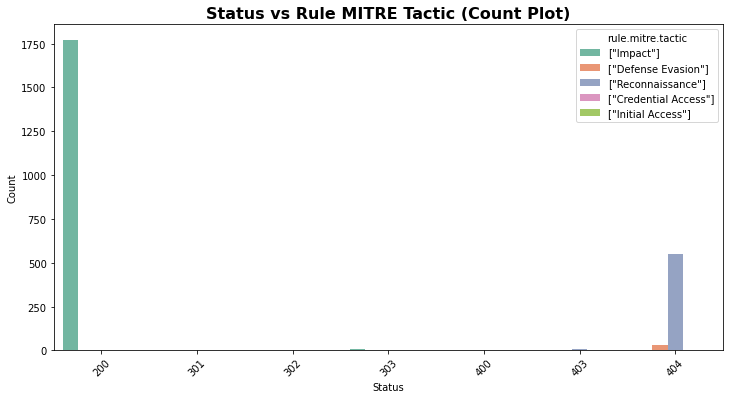

In [85]:
# Create a count plot to visualize the relationship between 'request' and 'rule.mitre.tactic'
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='status', hue='rule.mitre.tactic', palette='Set2')

plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Status vs Rule MITRE Tactic (Count Plot)', fontsize=16, fontweight='bold')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [92]:
unique_statuses = df['status'].unique()

# Iterate through each unique status code
for status_code in unique_statuses:
    # Filter the DataFrame for the current status code
    filtered_status = df[df['status'] == status_code]
    
    # Get the unique 'rule.mitre.tactic' values for the filtered data
    unique_tactics = filtered_status['rule.mitre.tactic'].unique()
    
    # Print the status code and associated tactics
    print(f"Status Code: {status_code}")
    print(f"Associated Tactics: {', '.join(unique_tactics)}")
    print("\n")


Status Code: 404
Associated Tactics: ["non-attack"], ["Defense Evasion"], ["Reconnaissance"]


Status Code: 502
Associated Tactics: ["non-attack"]


Status Code: 200
Associated Tactics: ["Impact"], ["Credential Access"], ["Initial Access"]


Status Code: 400
Associated Tactics: ["non-attack"], ["Reconnaissance"]


Status Code: 422
Associated Tactics: ["non-attack"]


Status Code: 500
Associated Tactics: ["non-attack"]


Status Code: 407
Associated Tactics: ["non-attack"]


Status Code: 403
Associated Tactics: ["non-attack"], ["Reconnaissance"]


Status Code: 504
Associated Tactics: ["non-attack"]


Status Code: 303
Associated Tactics: ["Impact"]


Status Code: 302
Associated Tactics: ["Impact"]


Status Code: 301
Associated Tactics: ["Defense Evasion"]


Status Code: 405
Associated Tactics: ["non-attack"]


Status Code: 413
Associated Tactics: ["non-attack"]




In [87]:
impact_df = df[df['rule.mitre.tactic'] == '["Impact"]']
impact_df

,id,timestamp,remote_addr,remote_user,hostname,time_local,request,status,body_bytes_sent,http_referer,...,upstream_header_time,upstream_response_time,upstream_addr,upstream_status,connection,connection_requests,data.srcip,agent.ip,rule.mitre.tactic,browser
38,38,"Aug 29, 2023 @ 17:05:43.445",66.96.233.60,-,vm-director-nginx,30/Aug/2023:00:05:42 +0700,POST /lib/ajax/service.php?sesskey=FyapD11LyJ&...,200,98,https://vlm2.notrealdomain.com/my/,...,0.03,0.03,10.45.184.157:32401,200,688312591,181,66.96.233.60,192.168.1.99,"[""Impact""]",Mozilla/5.0
54,54,"Aug 29, 2023 @ 17:08:23.939",118.99.125.4,-,vm-director-nginx,30/Aug/2023:00:08:23 +0700,POST /lib/ajax/service.php?sesskey=QY0HDC3szQ&...,200,1169,https://vlm2.notrealdomain.com/my/,...,0.066,0.068,10.45.184.143:32401,200,688315946,158,118.99.125.4,192.168.1.99,"[""Impact""]",Mozilla/5.0
98,98,"Aug 29, 2023 @ 17:16:56.322",125.166.1.20,-,vm-director-nginx,30/Aug/2023:00:16:54 +0700,POST /lib/ajax/service.php?sesskey=9dbAEW9y6f&...,200,27,https://vlm2.notrealdomain.com/course/view.php...,...,0.088,0.088,10.45.184.157:32401,200,688328194,209,125.166.1.20,192.168.1.99,"[""Impact""]",Mozilla/5.0
99,99,"Aug 29, 2023 @ 17:17:14.250",103.171.147.123,-,vm-director-nginx,30/Aug/2023:00:17:13 +0700,POST /lib/ajax/service.php?sesskey=nscrep2nd3&...,200,27,https://vlm2.notrealdomain.com/mod/assign/view...,...,0.098,0.098,10.45.184.157:32401,200,688330190,90,103.171.147.123,192.168.1.99,"[""Impact""]",Mozilla/5.0
187,187,"Aug 29, 2023 @ 17:22:58.771",180.248.17.197,-,vm-director-nginx,30/Aug/2023:00:22:56 +0700,POST /lib/ajax/service.php?sesskey=ezddPBRNs5&...,200,6712,https://vlm2.notrealdomain.com/my/,...,0.103,0.104,10.45.184.142:32401,200,688336653,219,180.248.17.197,192.168.1.99,"[""Impact""]",Mozilla/5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54369,54369,"Sep 5, 2023 @ 00:25:05.020",10.200.35.151,-,vm-director-nginx,05/Sep/2023:07:25:03 +0700,POST /lib/ajax/service.php?sesskey=r9rf7Ar6Ma&...,200,7754,https://vlm2.notrealdomain.com/my/,...,1.737,1.738,10.45.184.142:32401,200,721708471,159,10.200.35.151,192.168.1.99,"[""Impact""]",Mozilla/5.0
54400,54400,"Sep 5, 2023 @ 00:25:18.988",10.26.152.192,-,vm-director-nginx,05/Sep/2023:07:25:17 +0700,POST /webservice/rest/server.php?moodlewsrestf...,200,29,http://localhost/,...,0.092,0.092,10.45.184.143:32401,200,721705633,42,10.26.152.192,192.168.1.99,"[""Impact""]",Mozilla/5.0
54422,54422,"Sep 5, 2023 @ 00:26:11.136",114.125.125.255,-,vm-director-nginx,05/Sep/2023:07:26:08 +0700,POST /lib/ajax/service.php?sesskey=6paeON3gcf&...,200,27,https://vlm2.notrealdomain.com/mod/assign/view...,...,0.105,0.105,10.45.184.157:32401,200,721719773,41,114.125.125.255,192.168.1.99,"[""Impact""]",Mozilla/5.0
54458,54458,"Sep 5, 2023 @ 00:27:17.238",10.200.19.89,-,vm-director-nginx,05/Sep/2023:07:27:15 +0700,POST /lib/ajax/service.php?sesskey=S5HQ0GdN1T&...,200,67,https://vlm2.notrealdomain.com/my/,...,1.012,1.012,10.45.184.142:32401,200,721728907,180,10.200.19.89,192.168.1.99,"[""Impact""]",Mozilla/5.0


In [88]:
impact_df.describe()

,id,status,body_bytes_sent,request_length,bytes_sent,request_time,upstream_status,connection,connection_requests
count,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1.784000e+03,1784.000000
mean,27289.205717,200.690583,1377.278587,805.746076,1584.358744,0.289123,200.690583,7.041657e+08,187.079036
std,16978.214396,8.394280,4056.751519,12623.698503,4066.579100,0.619045,8.394280,1.089412e+07,196.163935
min,38.000000,200.000000,0.000000,94.000000,210.000000,0.009000,200.000000,6.883126e+08,1.000000
25%,11427.750000,200.000000,27.000000,173.000000,210.000000,0.066000,200.000000,6.950249e+08,31.000000
50%,25808.000000,200.000000,164.000000,268.000000,350.500000,0.090000,200.000000,7.068297e+08,162.000000
75%,43827.250000,200.000000,525.000000,416.750000,773.750000,0.177250,200.000000,7.136992e+08,219.250000
max,54466.000000,303.000000,64302.000000,458002.000000,64583.000000,11.807000,303.000000,7.217289e+08,998.000000


In [95]:
filtered_df.describe()

,id,status,body_bytes_sent,request_length,bytes_sent,request_time,upstream_status,connection,connection_requests
count,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2.379000e+03,2379.000000
mean,27767.715006,251.056747,1721.158890,689.647751,1946.585540,0.240235,251.056747,7.046321e+08,145.511559
std,16043.348935,88.051588,4398.047207,10933.132237,4439.494219,0.556006,88.051588,1.023289e+07,186.113658
min,38.000000,200.000000,0.000000,36.000000,167.000000,0.000000,200.000000,6.883126e+08,1.000000
25%,13260.000000,200.000000,29.000000,186.000000,228.000000,0.032000,200.000000,6.952976e+08,9.000000
50%,29375.000000,200.000000,229.000000,269.000000,417.000000,0.080000,200.000000,7.073381e+08,98.000000
75%,41263.000000,303.000000,808.000000,467.000000,1053.500000,0.162000,303.000000,7.133978e+08,199.000000
max,54466.000000,404.000000,65158.000000,458002.000000,65651.000000,11.807000,404.000000,7.217289e+08,998.000000


In [99]:
df[df['status'] == 403]['rule.mitre.tactic'].value_counts()

["non-attack"]        142
["Reconnaissance"]      9
Name: rule.mitre.tactic, dtype: int64

In [100]:
init_df

,id,timestamp,remote_addr,remote_user,hostname,time_local,request,status,body_bytes_sent,http_referer,...,upstream_header_time,upstream_response_time,upstream_addr,upstream_status,connection,connection_requests,data.srcip,agent.ip,rule.mitre.tactic,browser
46434,46434,"Sep 4, 2023 @ 00:43:49.612",36.78.203.232,-,vm-director-nginx,04/Sep/2023:07:43:49 +0700,GET /?PagePrincipale/rss&id=1%27+and+extractva...,200,4765,-,...,0.013,0.013,175.45.184.47:84,200,714087852,1,36.78.203.232,192.168.1.99,"[""Initial Access""]",Mozilla/5.0
46438,46438,"Sep 4, 2023 @ 00:43:51.579",36.78.203.232,-,vm-director-nginx,04/Sep/2023:07:43:49 +0700,GET /?xmlcontrol=body%20onload=alert(document....,200,4765,-,...,0.016,0.016,175.45.184.47:84,200,714087698,1,36.78.203.232,192.168.1.99,"[""Initial Access""]",Mozilla/5.0
46455,46455,"Sep 4, 2023 @ 00:43:55.603",36.78.203.232,-,vm-director-nginx,04/Sep/2023:07:43:54 +0700,GET /?PagePrincipale/rss&id=1%27+and+extractva...,200,1390,-,...,0.002,0.002,175.45.184.75:80,200,714088456,1,36.78.203.232,192.168.1.99,"[""Initial Access""]",Mozilla/5.0
51350,51350,"Sep 4, 2023 @ 23:44:54.042",36.84.105.77,-,vm-director-nginx,05/Sep/2023:06:44:52 +0700,GET /auth/realms/ub/protocol/saml?SAMLRequest=...,200,4353,https://vlm2.notrealdomain.com/,...,0.017,0.017,10.45.184.148:32442,200,721446405,6,36.84.105.77,192.168.1.99,"[""Initial Access""]",Mozilla/5.0


In [108]:
df[df['browser'].str.contains('Mozlila')]['rule.mitre.tactic'].value_counts()

["non-attack"]         2003
["Reconnaissance"]      128
["Defense Evasion"]       6
Name: rule.mitre.tactic, dtype: int64

In [115]:
print(df['connection_requests'].value_counts().mean())
filtered_df['connection_requests'].value_counts().mean()

98.87477313974591


4.875

<AxesSubplot: xlabel='rule.mitre.tactic', ylabel='request_length'>

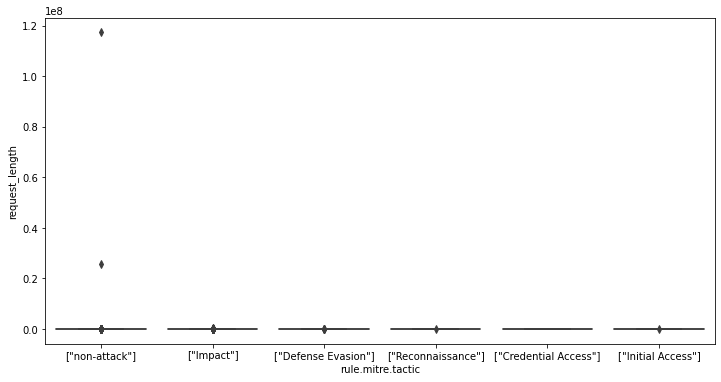

In [122]:
# Box plots or violin plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='rule.mitre.tactic', y='request_length')


In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()